In [43]:
from igraph import *
import cairo

In [3]:
g = Graph.Tree(10, 3)
print(g.summary())

IGRAPH U--- 10 9 -- 


### Get 1-net for graph

In [55]:
# returns list of 1-net labels for initial graph
def get_net(graph):
    result_graph = Graph()   
    # adjacency matrix for initial graph
    adjlist = graph.get_adjlist()
        
    # loop through all nodes of initial graph
    for ind, node in enumerate(graph.vs):
        # get adjacent vertices for node
        adj_vertices = list(map(lambda adj_index: graph.vs[adj_index], adjlist[ind]))
        adj_vertices.append(node)
        
        # put max degree vertice to net(if not in the net already)
        max_vertice = sorted(adj_vertices, key=lambda node: node.degree(), reverse=True)[0]
        try:
            result_graph.vs.find(label=max_vertice["label"])
        except:
            result_graph.add_vertex(**max_vertice.attributes())
        
    return list(map(lambda node: node["label"], result_graph.vs))
    
# get a random geometric graph and set labels
def init_graph(n=10, radius=0.5):
    g = Graph.GRG(n, radius)
    g.vs["color"] = "green"
    for ind, val in enumerate(g.vs):
        g.vs[ind]["label"] = ind
        
    return g

### Check get_net method

In [45]:
g = init_graph()
draw_result(g, get_net(g))

In [46]:
g.summary()


'IGRAPH U--- 10 17 -- \n+ attr: color (v), label (v), x (v), y (v)'

In [47]:
print(get_net(g))

[3, 0, 5]


In [49]:
print(list(g.vs))

[igraph.Vertex(<igraph.Graph object at 0x7ff5ccccc6d8>, 0, {'x': 0.15281363251902824, 'y': 0.29810723302272946, 'color': 'red', 'label': 0}), igraph.Vertex(<igraph.Graph object at 0x7ff5ccccc6d8>, 1, {'x': 0.15529374937588747, 'y': 0.17004699740538753, 'color': 'green', 'label': 1}), igraph.Vertex(<igraph.Graph object at 0x7ff5ccccc6d8>, 2, {'x': 0.16789909303499206, 'y': 0.020345036484102574, 'color': 'green', 'label': 2}), igraph.Vertex(<igraph.Graph object at 0x7ff5ccccc6d8>, 3, {'x': 0.3647606415436463, 'y': 0.633363758263481, 'color': 'red', 'label': 3}), igraph.Vertex(<igraph.Graph object at 0x7ff5ccccc6d8>, 4, {'x': 0.6661862911690759, 'y': 0.8437355128314943, 'color': 'green', 'label': 4}), igraph.Vertex(<igraph.Graph object at 0x7ff5ccccc6d8>, 5, {'x': 0.7120068438538448, 'y': 0.36602424892145524, 'color': 'red', 'label': 5}), igraph.Vertex(<igraph.Graph object at 0x7ff5ccccc6d8>, 6, {'x': 0.7246463331824562, 'y': 0.3218523092696185, 'color': 'green', 'label': 6}), igraph.Vert

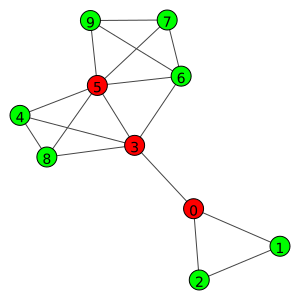

In [56]:
li = get_net(g)
draw_result(g, li)

In [60]:
for i in range(1):
    g = init_graph()
    label_map = get_net(g)

    for label in label_map:
        g.vs.find(label=label)["color"] = "red"

    layout = g.layout("kk")
    plot(g, bbox=(300, 300), margin=20)    

In [77]:
def fun():
    layout = g.layout("kk")
    return plot(g, layout=layout, bbox=(300, 300), margin=20)
fun()
fun()
fun()

TypeError: bounding boxes work for 2D layouts only